# LINEAR_REGREESION_MULTIVARIABLE

The goal of multiple linear regression (MLR) is to model the linear relationship between the explanatory (independent) variables and response (dependent) variable.

In essence, multiple regression is the extension of ordinary least-squares (OLS) regressionthat involves more than one explanatory variable.

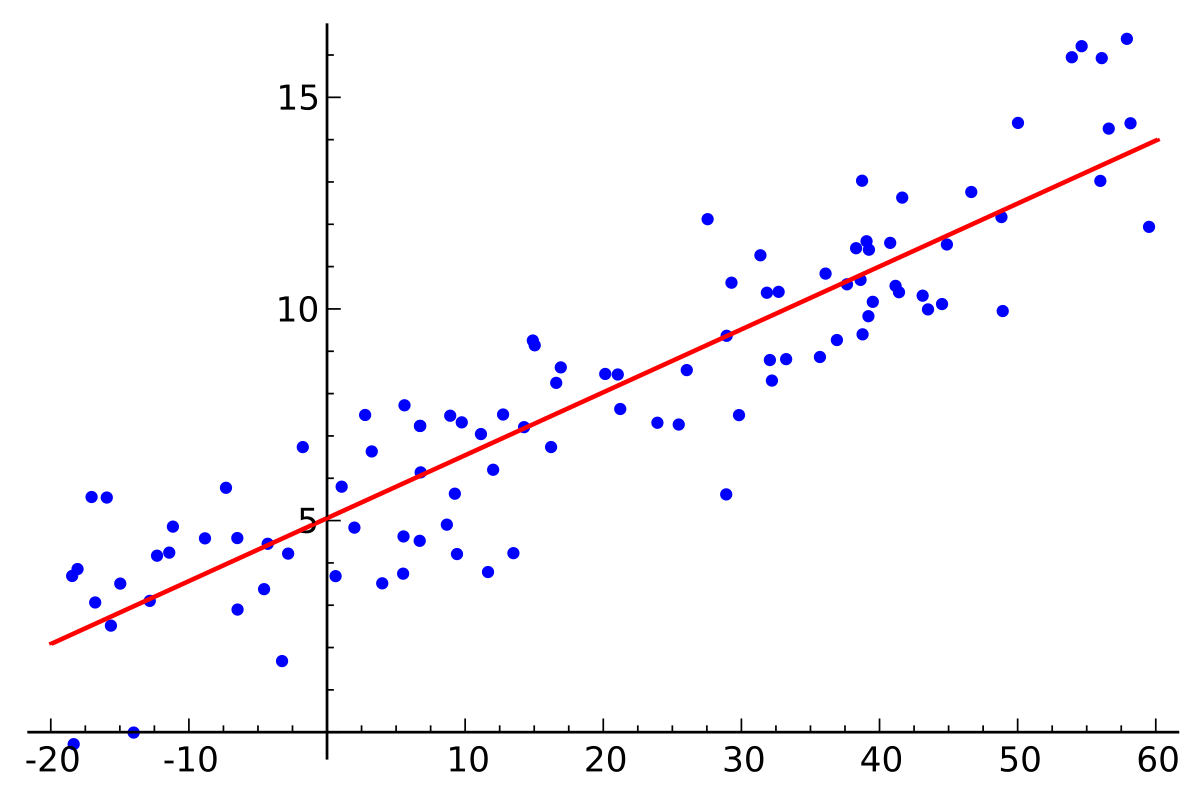

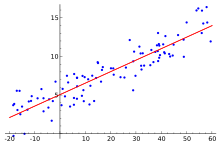

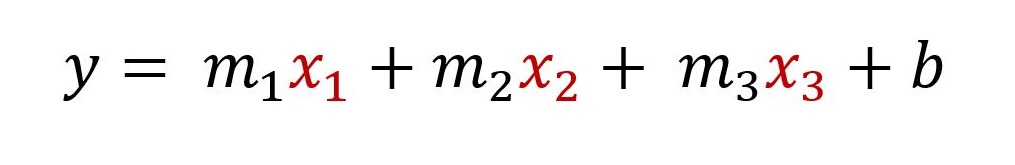

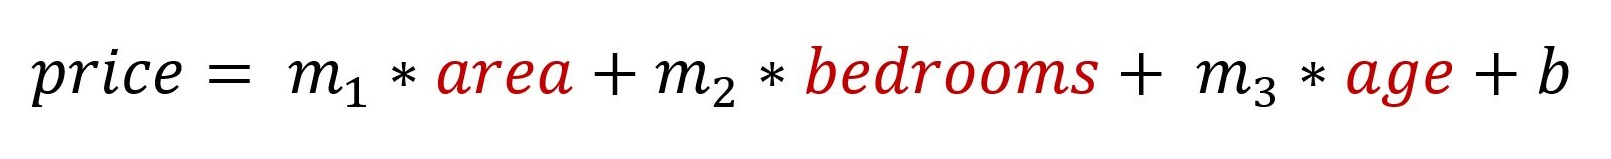

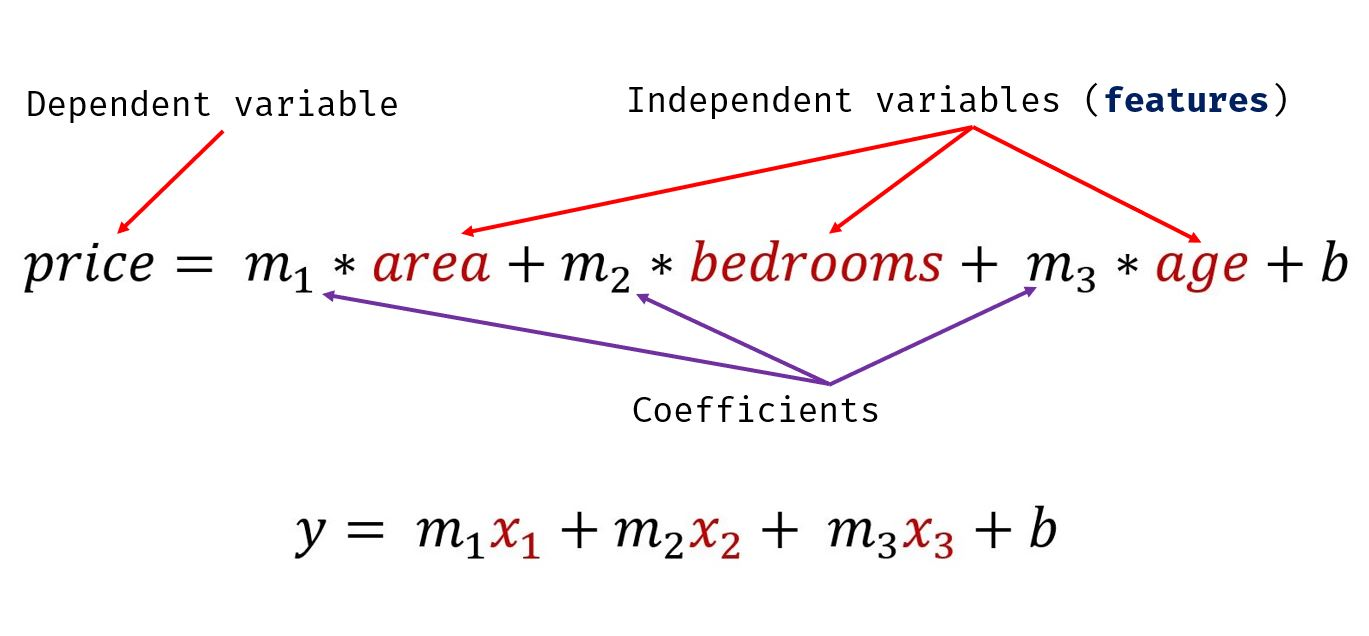

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("homeprices.csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [2]:
df.bedrooms.median()

4.0

In [3]:
df.bedrooms.fillna(df.bedrooms.median())

0    3.0
1    4.0
2    4.0
3    3.0
4    5.0
5    6.0
Name: bedrooms, dtype: float64

In [4]:
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())

In [5]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


![image.png](attachment:image.png)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002267DE9B128>,
      dtype=object)

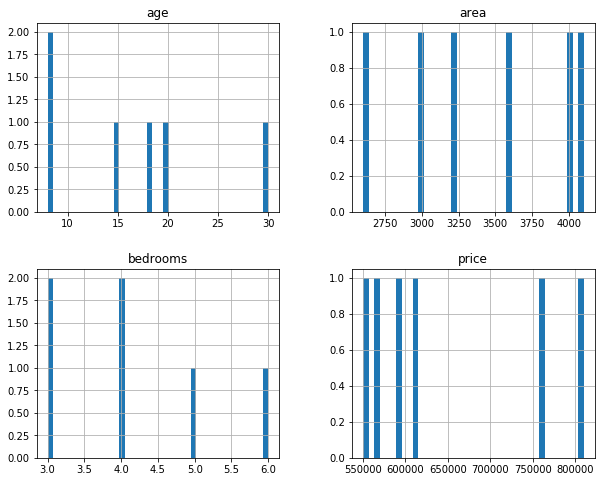

In [8]:
df.hist(bins = 40,figsize=(10,8))

Text(0,0.5,'AGE')

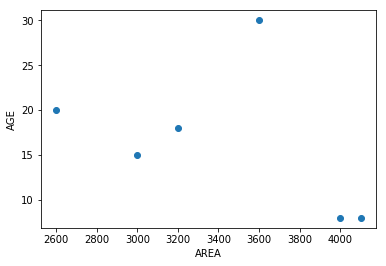

In [10]:
plt.scatter(df.area,df.age)
plt.xlabel("AREA")
plt.ylabel("AGE")

Text(0,0.5,'PRICE')

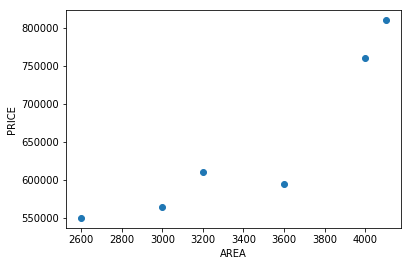

In [11]:
plt.scatter(df.area,df.price)
plt.xlabel("AREA")
plt.ylabel("PRICE")

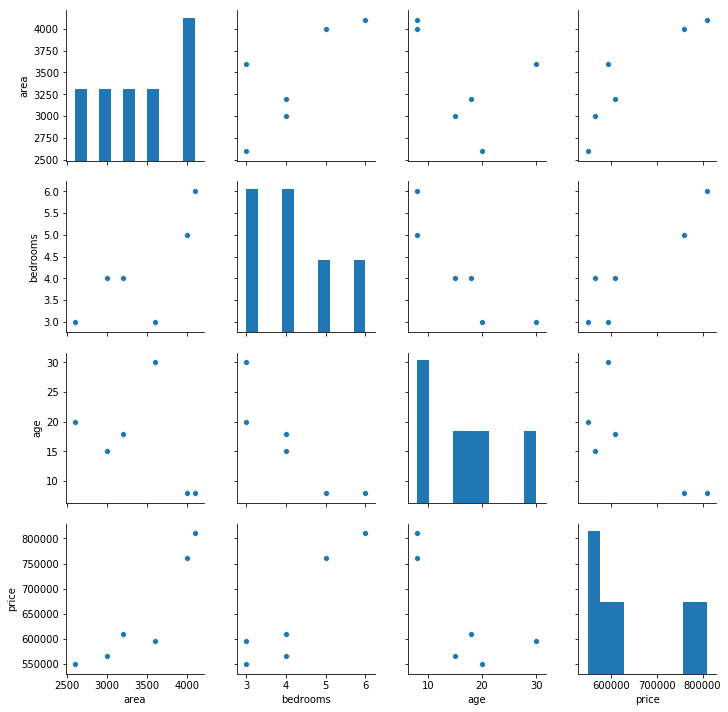

In [12]:
import seaborn as sn
sn.pairplot(df)

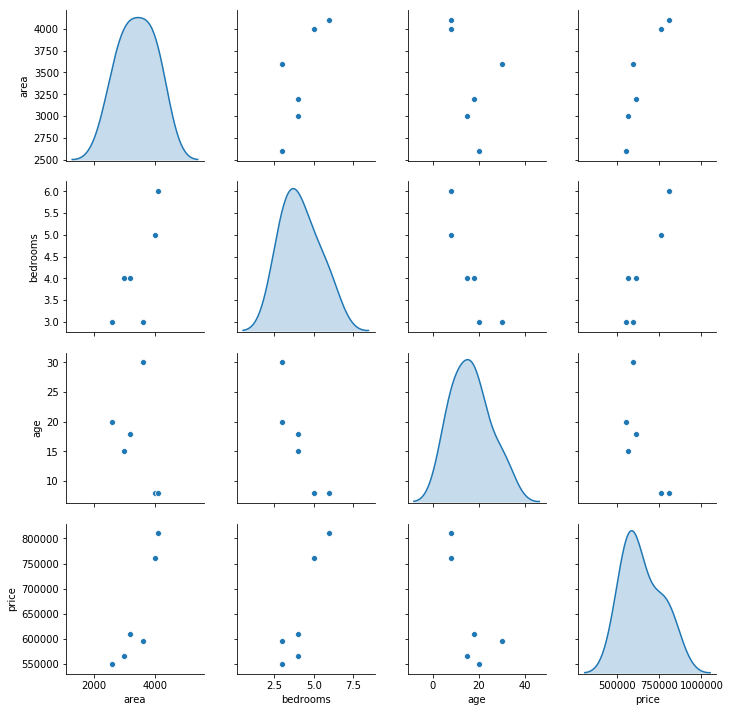

In [13]:
sn.pairplot(df,diag_kind="kde")

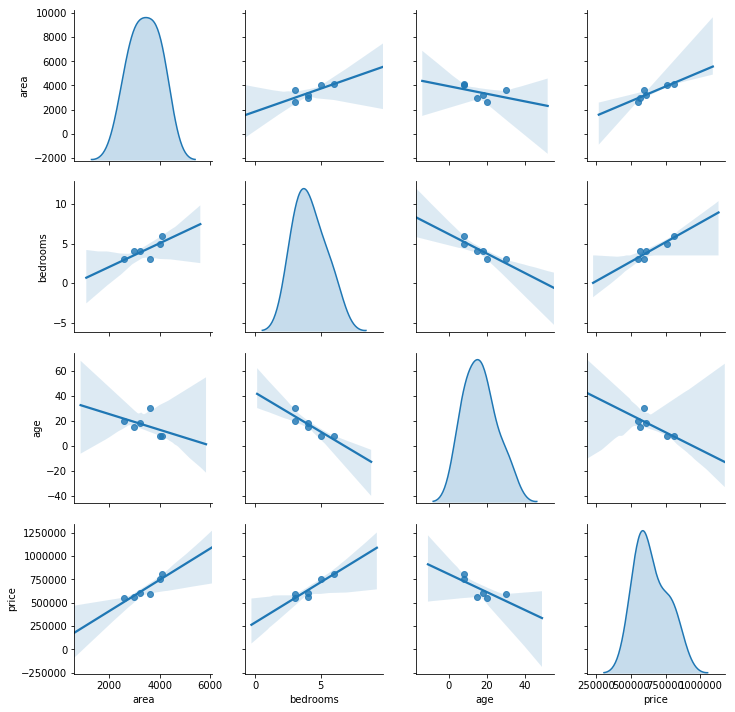

In [14]:
sn.pairplot(df,diag_kind="kde",kind = "reg")

In [15]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [16]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(df[["area","bedrooms","age"]],df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
reg.predict([[2400,4,12]])

array([545047.76793469])

In [18]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [19]:
reg.intercept_

221323.00186540408

In [20]:
reg.score(df[["area","bedrooms","age"]],df.price)

0.9550196399325819

#PRACTICES

In [21]:
df1 = pd.read_csv("hirings.csv")
df1

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [22]:
df1.experience.fillna("zero")

0      zero
1      zero
2      five
3       two
4     seven
5     three
6       ten
7    eleven
Name: experience, dtype: object

In [23]:
df1.experience = df1.experience.fillna("zero")

In [24]:
df1

,experience,test_score,interview_score,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [26]:
#pip install word2number

from word2number import w2n
df1.experience = df1.experience.apply(w2n.word_to_num)

In [27]:
df1

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [28]:
df1.test_score.median()

8.0

In [29]:
df1.test_score.fillna(df1.test_score.median())

0     8.0
1     8.0
2     6.0
3    10.0
4     9.0
5     7.0
6     8.0
7     7.0
Name: test_score, dtype: float64

In [30]:
df1.test_score = df1.test_score.fillna(df1.test_score.median())

In [31]:
df1

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022605B22780>,
      dtype=object)

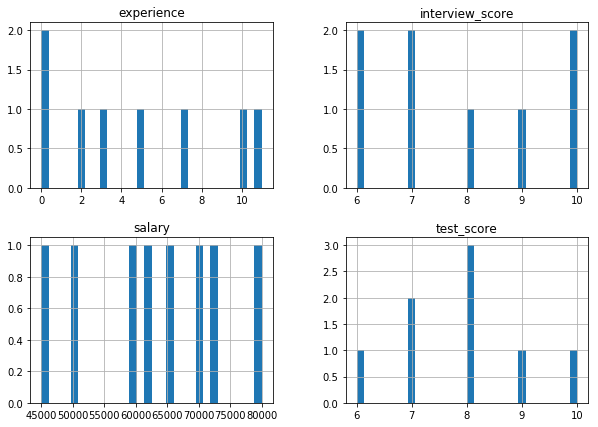

In [34]:
df1.hist(bins = 30,figsize=(10,7))

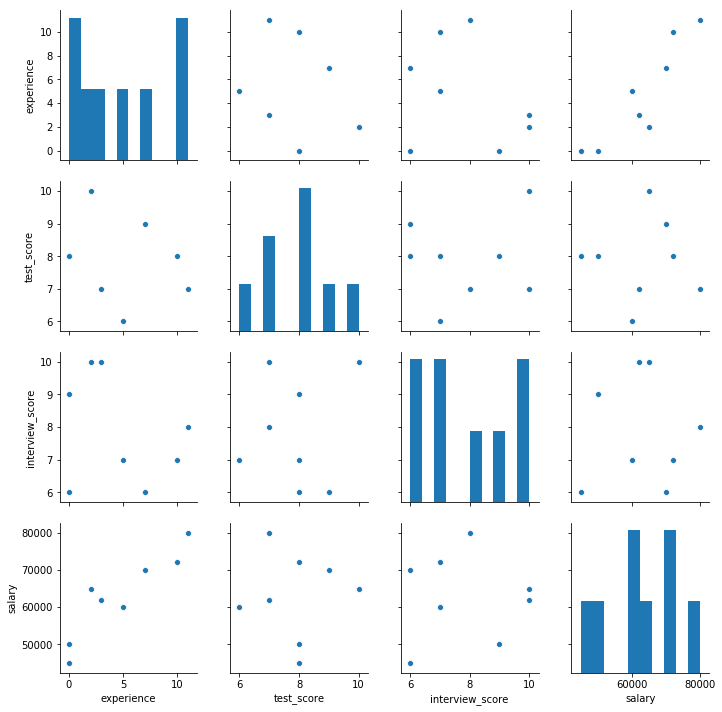

In [35]:
sn.pairplot(df1)

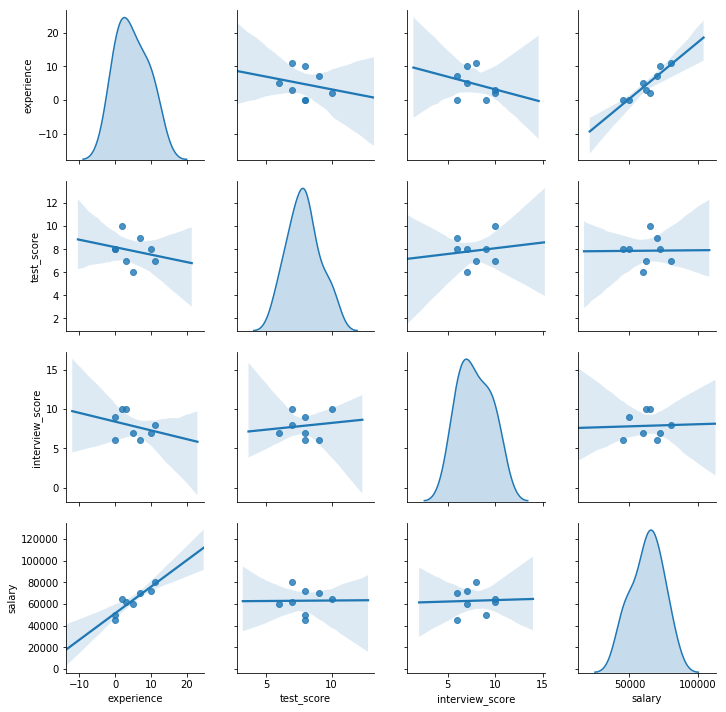

In [36]:
sn.pairplot(df1,diag_kind="kde",kind= "reg")

In [32]:
reg1 = LinearRegression()
reg1.fit(df1[["experience","test_score","interview_score"]],df1.salary)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
reg1.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [37]:
reg1.intercept_

17737.26346433771

In [38]:
reg1.predict([[0,10,10]])

array([58246.72489083])

In [40]:
reg1.predict([[3,10,10],[12,5,7]])

array([66685.58951965, 76157.93304221])

In [41]:
reg1.score(df1[["experience","test_score","interview_score"]],df1.salary)

0.9616780002577959